In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel(r"C:\Users\dell\Downloads\CocaCola_Sales_Rawdata.xlsx")

In [3]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
date=pd.DataFrame(pd.date_range(start = '1986-01-01', end = '1996-06-30', freq = 'Q'), columns = ["Quarter"])

In [5]:
s=pd.concat([date,data.drop('Quarter',axis=1)],axis=1)

In [6]:
s

,Quarter,Sales
0,1986-03-31,1734.827000
1,1986-06-30,2244.960999
2,1986-09-30,2533.804993
3,1986-12-31,2154.962997
4,1987-03-31,1547.818996
5,1987-06-30,2104.411995
6,1987-09-30,2014.362999
7,1987-12-31,1991.746998
8,1988-03-31,1869.049999
9,1988-06-30,2313.631996


In [7]:
m=s.set_index('Quarter')

In [8]:
m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-03-31 to 1996-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


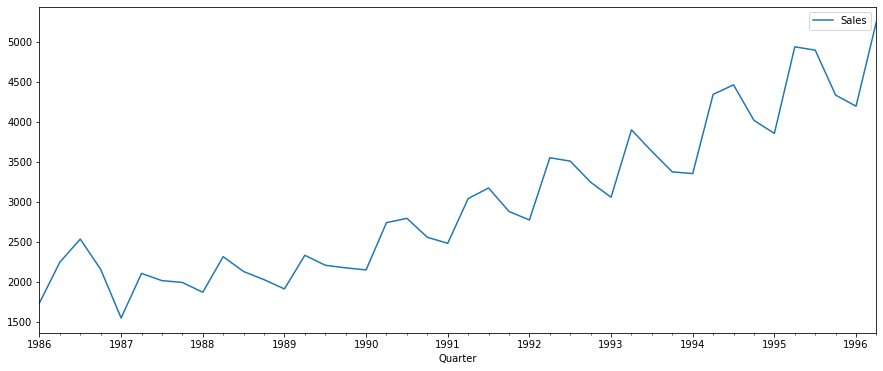

In [9]:
import matplotlib.pyplot as plt
m.plot(figsize=(15, 6))
plt.show()

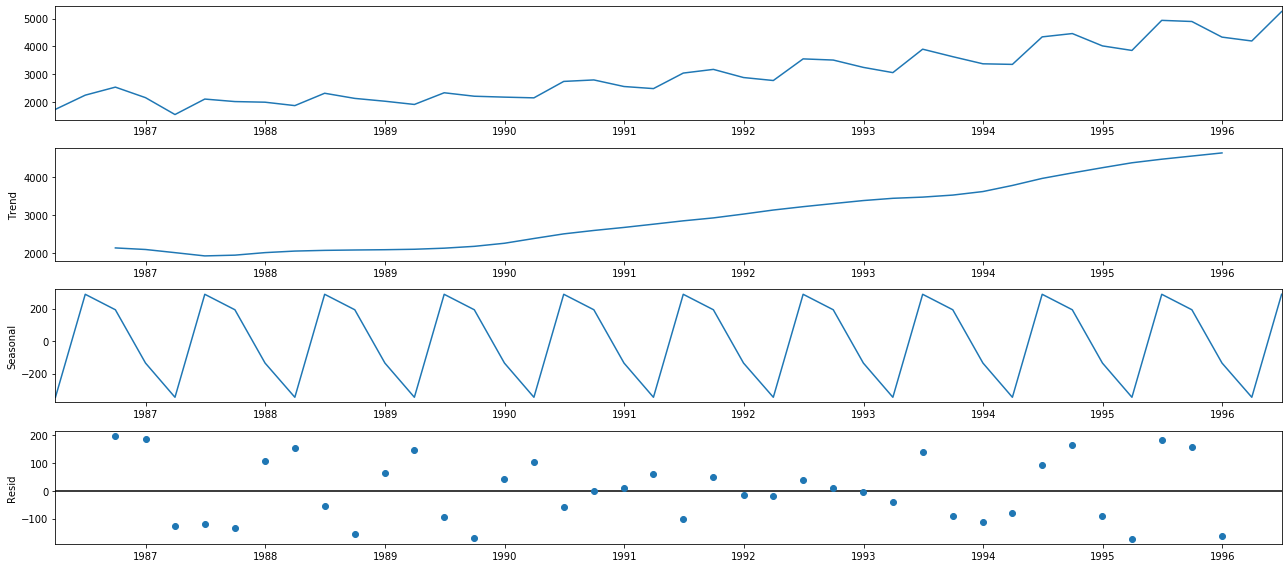

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(m, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue      

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:779.4776901515575
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:666.4305752364395
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:544.0752692392402


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:477.3507813796081
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:523.5341578720215
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:505.95050357752194
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:481.3598832037066


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:460.9658110959242
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:719.0798389340446


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:614.5047883852451
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:497.93553933899864
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:435.06911451756565


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:507.4040060480273


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:477.79410367906866
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:462.8168376058148


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:434.5973005492125
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:601.8554412044298
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:511.4788643998348
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:476.41165114206933


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:408.9386355978868
ARIMA(0, 1, 0)x(1, 0, 0, 4)4 - AIC:490.30563154233664
ARIMA(0, 1, 0)x(1, 0, 1, 4)4 - AIC:479.26549477049315
ARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:421.2294712963933


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 4)4 - AIC:410.57437445023913
ARIMA(0, 1, 1)x(0, 0, 0, 4)4 - AIC:583.735394708149
ARIMA(0, 1, 1)x(0, 0, 1, 4)4 - AIC:500.56284961757706


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:461.35226638539956
ARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:398.00159596248767
ARIMA(0, 1, 1)x(1, 0, 0, 4)4 - AIC:492.17254643690814


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 4)4 - AIC:464.3620817868658
ARIMA(0, 1, 1)x(1, 1, 0, 4)4 - AIC:422.69431377310633


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 4)4 - AIC:399.8766300111208
ARIMA(1, 0, 0)x(0, 0, 0, 4)4 - AIC:618.2709977010238
ARIMA(1, 0, 0)x(0, 0, 1, 4)4 - AIC:528.5096290186723


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 4)4 - AIC:488.74257063613425
ARIMA(1, 0, 0)x(0, 1, 1, 4)4 - AIC:422.400526579086


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 4)4 - AIC:488.1649702122628


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 4)4 - AIC:486.31809900600115
ARIMA(1, 0, 0)x(1, 1, 0, 4)4 - AIC:422.39108226682123


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 4)4 - AIC:424.33723466922424
ARIMA(1, 0, 1)x(0, 0, 0, 4)4 - AIC:591.6552225153814


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 4)4 - AIC:503.86799947349834
ARIMA(1, 0, 1)x(0, 1, 0, 4)4 - AIC:478.58455598177574


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 4)4 - AIC:412.29579614486914
ARIMA(1, 0, 1)x(1, 0, 0, 4)4 - AIC:489.39459667150925


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWar

ARIMA(1, 0, 1)x(1, 0, 1, 4)4 - AIC:472.7181275972849
ARIMA(1, 0, 1)x(1, 1, 0, 4)4 - AIC:424.28421112098295
ARIMA(1, 0, 1)x(1, 1, 1, 4)4 - AIC:414.01466539966253
ARIMA(1, 1, 0)x(0, 0, 0, 4)4 - AIC:603.3704330472478
ARIMA(1, 1, 0)x(0, 0, 1, 4)4 - AIC:513.478863279839


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 4)4 - AIC:478.3599604017804
ARIMA(1, 1, 0)x(0, 1, 1, 4)4 - AIC:410.911924344699


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 4)4 - AIC:479.9428523082572


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 4)4 - AIC:481.2584924779834
ARIMA(1, 1, 0)x(1, 1, 0, 4)4 - AIC:410.9113437554592


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 4)4 - AIC:412.5472729492976
ARIMA(1, 1, 1)x(0, 0, 0, 4)4 - AIC:585.5132305580726


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 4)4 - AIC:500.32294992513704
ARIMA(1, 1, 1)x(0, 1, 0, 4)4 - AIC:460.6228827432159


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 4)4 - AIC:397.9938905210651


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 4)4 - AIC:479.7782517038494


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWar

ARIMA(1, 1, 1)x(1, 0, 1, 4)4 - AIC:465.71430174533157
ARIMA(1, 1, 1)x(1, 1, 0, 4)4 - AIC:410.9631531322024


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 4)4 - AIC:399.5656555879208


In [13]:
mod = sm.tsa.statespace.SARIMAX(m,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7626      0.157      4.865      0.000       0.455       1.070
ma.L1         -1.0000      0.316     -3.160      0.002      -1.620      -0.380
ar.S.L4        0.1791      0.384      0.466      0.641      -0.574       0.932
ma.S.L4       -0.3390      0.453     -0.748      0.454      -1.227       0.549
sigma2      1.539e+04   2.06e-05   7.48e+08      0.000    1.54e+04    1.54e+04


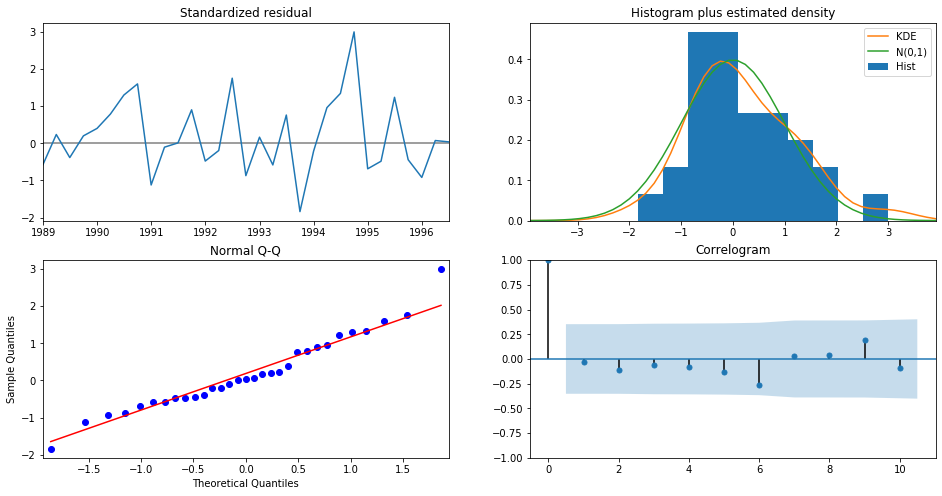

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

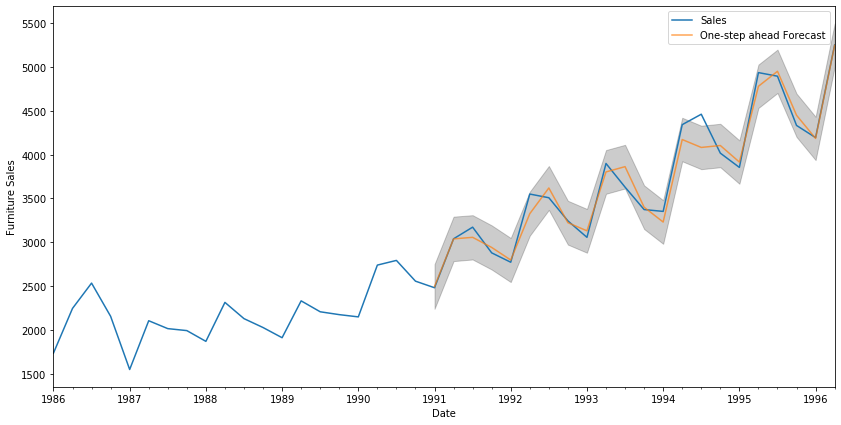

In [15]:
pred = results.get_prediction(start=pd.to_datetime('1991-03-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = m['1986':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [16]:
pred.predicted_mean

1991-03-31    2494.753468
1991-06-30    3038.377974
1991-09-30    3056.202297
1991-12-31    2940.733413
1992-03-31    2797.180221
1992-06-30    3325.982578
1992-09-30    3619.471940
1992-12-31    3223.087038
1993-03-31    3130.376382
1993-06-30    3802.571027
1993-09-30    3862.741777
1993-12-31    3400.038065
1994-03-31    3230.589493
1994-06-30    4172.196915
1994-09-30    4081.962520
1994-12-31    4104.032348
1995-03-31    3915.180619
1995-06-30    4779.975780
1995-09-30    4950.960678
1995-12-31    4449.098802
1996-03-31    4184.858704
1996-06-30    5248.454085
Freq: Q-DEC, dtype: float64

In [17]:
m['1991-03-31':]

,Sales
Quarter,
1991-03-31,2480.973999
1991-06-30,3039.522995
1991-09-30,3172.115997
1991-12-31,2879.000999
1992-03-31,2772.000000
1992-06-30,3550.000000
1992-09-30,3508.000000
1992-12-31,3243.859993
1993-03-31,3056.000000


In [25]:
y_truth.info()

NameError: name 'y_truth' is not defined

In [30]:
y_forecasted = pred.predicted_mean

In [33]:
y_truth.index

DatetimeIndex(['1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30'],
              dtype='datetime64[ns]', name='Quarter', freq=None)

In [34]:
np.array(y_forecasted)

array([2494.75346807, 3038.37797436, 3056.2022968 , 2940.73341253,
       2797.18022064, 3325.98257769, 3619.47193969, 3223.08703816,
       3130.37638227, 3802.57102688, 3862.74177674, 3400.03806541,
       3230.58949342, 4172.19691463, 4081.96252038, 4104.03234844,
       3915.18061916, 4779.97578038, 4950.96067758, 4449.09880223,
       4184.85870393, 5248.45408536])

In [35]:
y_truth.shape

(22, 1)

In [32]:
y=pd.DataFrame((y_forecasted),index=y_truth.index)

In [37]:
y

,0
Quarter,
1991-03-31,2494.753468
1991-06-30,3038.377974
1991-09-30,3056.202297
1991-12-31,2940.733413
1992-03-31,2797.180221
1992-06-30,3325.982578
1992-09-30,3619.471940
1992-12-31,3223.087038
1993-03-31,3130.376382


In [42]:
mse = ((y - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Sales    17769.51
dtype: float64


In [39]:
y_truth = m['1991-03-31':]

In [40]:
y.columns=['Sales']

In [41]:
y

,Sales
Quarter,
1991-03-31,2494.753468
1991-06-30,3038.377974
1991-09-30,3056.202297
1991-12-31,2940.733413
1992-03-31,2797.180221
1992-06-30,3325.982578
1992-09-30,3619.471940
1992-12-31,3223.087038
1993-03-31,3130.376382


In [43]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is Sales    133.3
dtype: float64


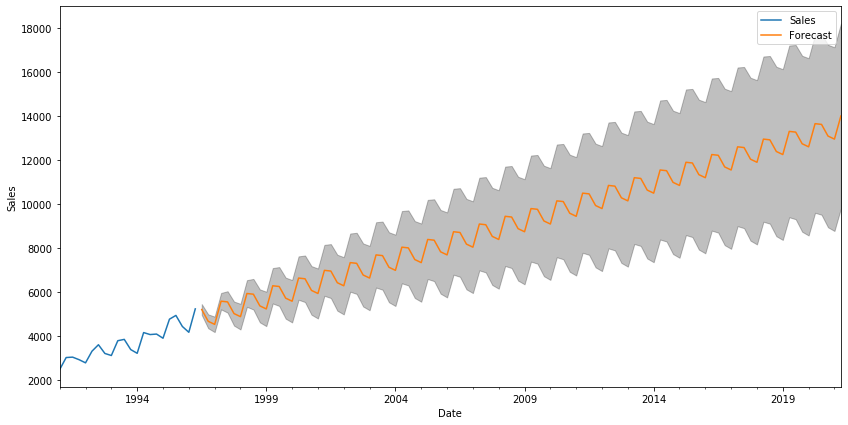

In [44]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()